In [1]:
# importing essential libraries
import string 
import re
import codecs
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

In [2]:
df= pd.read_csv("Language Detection.csv")
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
df["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

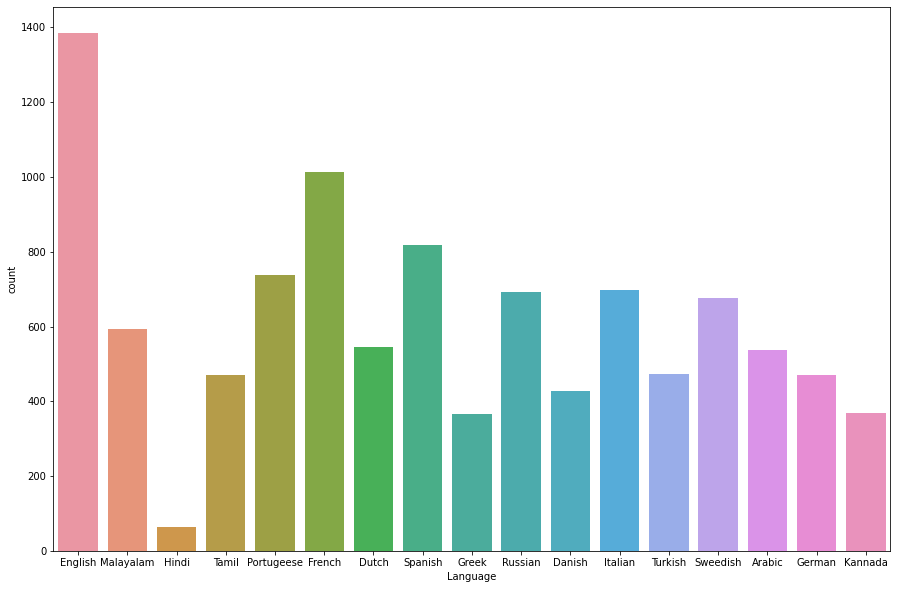

In [4]:
plt.figure(figsize=(15,10))
sns.countplot(x = df['Language'], data=df)
plt.savefig('langplot.png', bbox_inches='tight')

In [5]:
#Separating Independent and Dependent features
X = df["Text"]
y = df["Language"]

In [6]:
#Label Encoding to convert it into a numerical form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
#Text preprocessing
data_list = []

# iterating through all the text
for text in X:         
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)      # removing the symbols and numbers
    text = re.sub(r'[[]]', ' ', text)   
    text = text.lower()          # converting the text to lower case
    data_list.append(text)       # appending to data_list

C:\Users\nilak\AppData\Local\Temp\ipykernel_17992\1275053561.py:7: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


In [8]:
#Bag of Words [ converting text into numerical form by creating a Bag of Words model using CountVectorizer]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() # tokenize a collection of text documents
x= cv.fit_transform(data_list).toarray()
x.shape 

(10337, 34937)

In [9]:
#train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [22]:
# Naive Bayes model
# Model Training
from sklearn.naive_bayes import MultinomialNB  #classifier is suitable for classification with discrete features
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [11]:
#predict output for test dataset
y_pred = model.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [13]:
print("Accuracy is :",ac)

Accuracy is : 0.9753384912959381


In [14]:
# confusion matrix
print(cm)

[[ 87   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  67   0   0   1   0   0   0   0   0   0   2   0   0   1   0   0]
 [  0   0 109   2   1   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 272   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1 218   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   1   0   1  93   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0  71   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   9   0   0   0   0   0   0   0   0   0]
 [  0   0   1   1   0   0   0   0 147   0   0   2   0   4   0   0   0]
 [  0   1   0   4   0   0   0   0   0  73   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0 104   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0 137   0   0   0   0   0]
 [  0   0   0   4   0   0   0   0   0   0   0   0 146   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0   0   1   0 158   0   0   0]
 [  0 

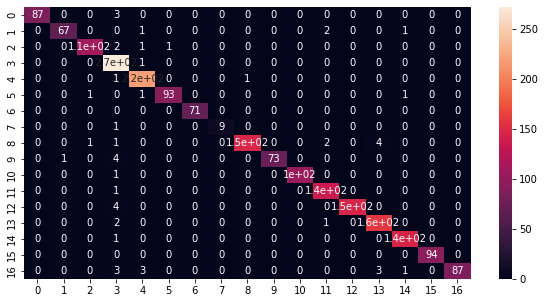

In [15]:
# visualising the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot = True)
plt.show()


In [16]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        90
           1       0.99      0.94      0.96        71
           2       0.98      0.96      0.97       113
           3       0.92      1.00      0.96       273
           4       0.97      0.99      0.98       220
           5       0.99      0.97      0.98        96
           6       1.00      1.00      1.00        71
           7       1.00      0.90      0.95        10
           8       0.99      0.95      0.97       155
           9       1.00      0.94      0.97        78
          10       1.00      0.99      1.00       105
          11       0.96      0.99      0.98       138
          12       1.00      0.97      0.99       150
          13       0.96      0.98      0.97       161
          14       0.98      0.99      0.99       146
          15       1.00      1.00      1.00        94
          16       1.00      0.90      0.95        97

    accuracy              

In [17]:
#Testing 
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [18]:
predict('People are awesome')

The langauge is in English


In [23]:
predict('കഴിക്കുക')

The langauge is in Malayalam


In [20]:
predict("je t'aime")

The langauge is in French


In [21]:
predict('धन्यवाद')

The langauge is in Hindi
